# LinearRegression et Support Vector Machine (SVC)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
data = pd.read_csv("data/iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Le support vector machine est une regression linaire automatique, il monte de degre pour trouver la meilleur regression linaire 

SVC quand Y est uen valeur discrete (on veut devenir des classe comme dans les espèce pinguins)

SVR quand Y est une valeur continue (on veut predire un prix)

In [2]:
data["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [3]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [4]:
X = data.drop(["variety"], axis=1)
y = data["variety"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# random_state : int, RandomState instance or None, optional (default=None)

In [5]:
X_train.shape

(100, 4)

In [6]:
X_test.shape

(50, 4)

In [7]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.98

<Axes: >

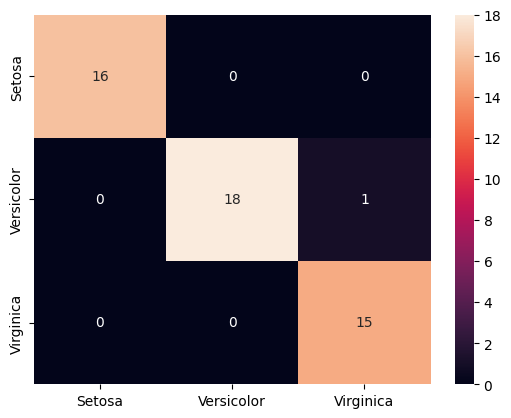

In [8]:
from sklearn.metrics import confusion_matrix
# confusion_matrix : une matrice qui permet de voir si le modèle à réussi à prédire les bonnes valeurs
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=data["variety"].unique(), yticklabels=data["variety"].unique())

# Changement de méthode d'apprentissage : KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

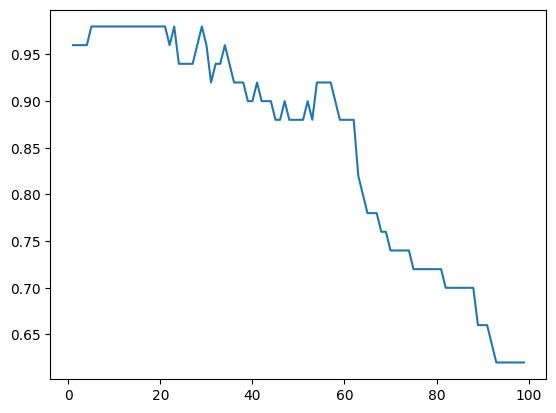

In [10]:
plt.plot(range(1, 100), scores)

In [11]:
# best score index 
best_n_neighbors = scores.index(max(scores))+1

In [12]:
model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.98

<Axes: >

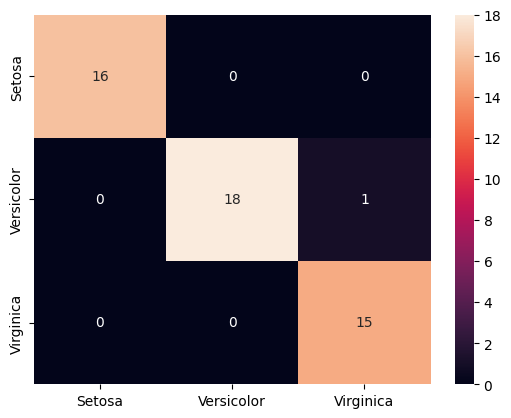

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=data["variety"].unique(), yticklabels=data["variety"].unique())